In [3]:
import pandas as pd

df = pd.read_csv("exams_mod.csv")

df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


(None,
    gender race/ethnicity parental level of education         lunch  \
 0    Male        group A                 high school      standard   
 1  Female        group D            some high school  free/reduced   
 2    Male        group E                some college  free/reduced   
 3    Male        group B                 high school      standard   
 4    Male        group E          associate's degree      standard   
 
   test preparation course  math score  reading score  writing score  \
 0               completed          67             67             63   
 1                    none          40             29             55   
 2                    none          59             60             50   
 3                    none          77             78             68   
 4               completed          78             73             68   
 
    id_student  address  Year   Age  
 0        1000      NaN  2023  14.0  
 1        1001      NaN  2023  17.0  
 2        1002   

In [4]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


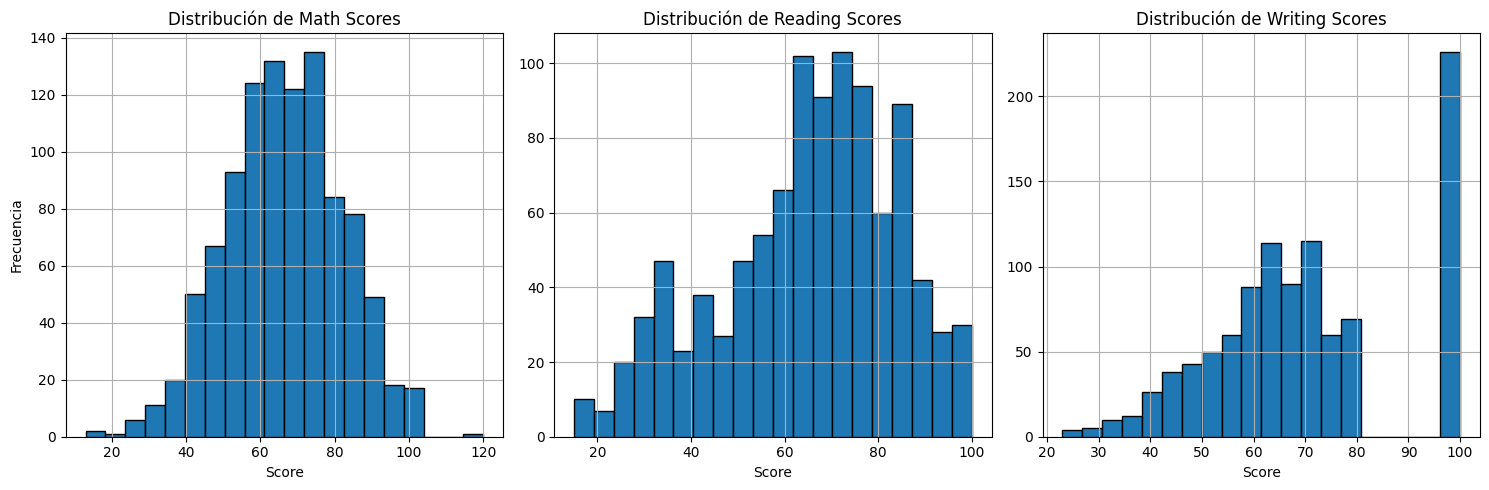

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import matplotlib.pyplot as plt

# Estadísticas descriptivas de las calificaciones
stats = df[['math score', 'reading score', 'writing score']].describe()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df['math score'].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title('Distribución de Math Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frecuencia')

df['reading score'].hist(ax=axes[1], bins=20, edgecolor='black')
axes[1].set_title('Distribución de Reading Scores')
axes[1].set_xlabel('Score')

df['writing score'].hist(ax=axes[2], bins=20, edgecolor='black')
axes[2].set_title('Distribución de Writing Scores')
axes[2].set_xlabel('Score')

plt.tight_layout()
plt.show()

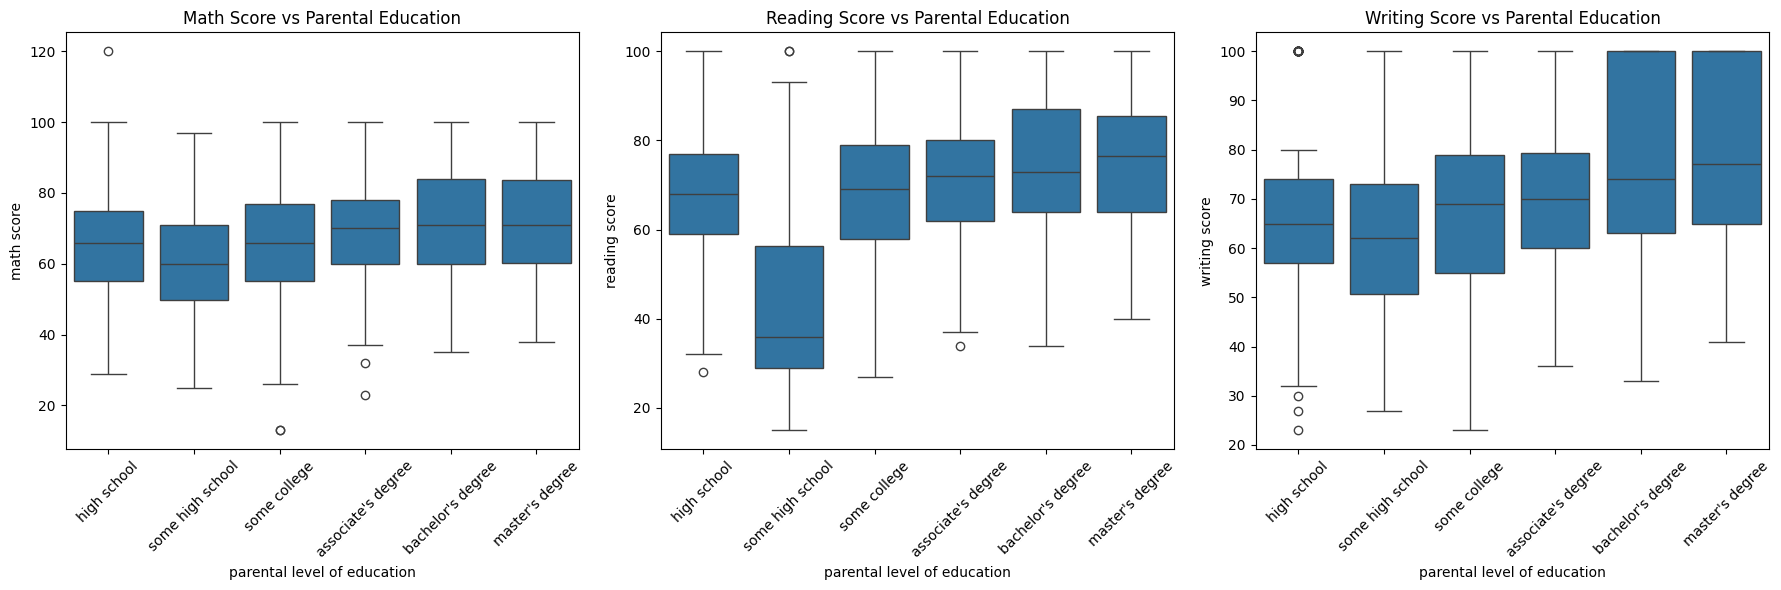

In [6]:
import seaborn as sns

# Boxplots para comparar las calificaciones según el nivel educativo de los padres
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x="parental level of education", y="math score", ax=axes[0])
axes[0].set_title("Math Score vs Parental Education")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="parental level of education", y="reading score", ax=axes[1])
axes[1].set_title("Reading Score vs Parental Education")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x="parental level of education", y="writing score", ax=axes[2])
axes[2].set_title("Writing Score vs Parental Education")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Se observa una clara tendencia: los estudiantes cuyos padres tienen mayor nivel educativo tienden a obtener mejores calificaciones en matemáticas, lectura y escritura.
Los estudiantes cuyos padres solo completaron la secundaria o menos tienden a obtener notas más bajas, especialmente en lectura y escritura.
Los valores atípicos sugieren que hay estudiantes con rendimientos extremadamente bajos, independientemente del nivel educativo de los padres.

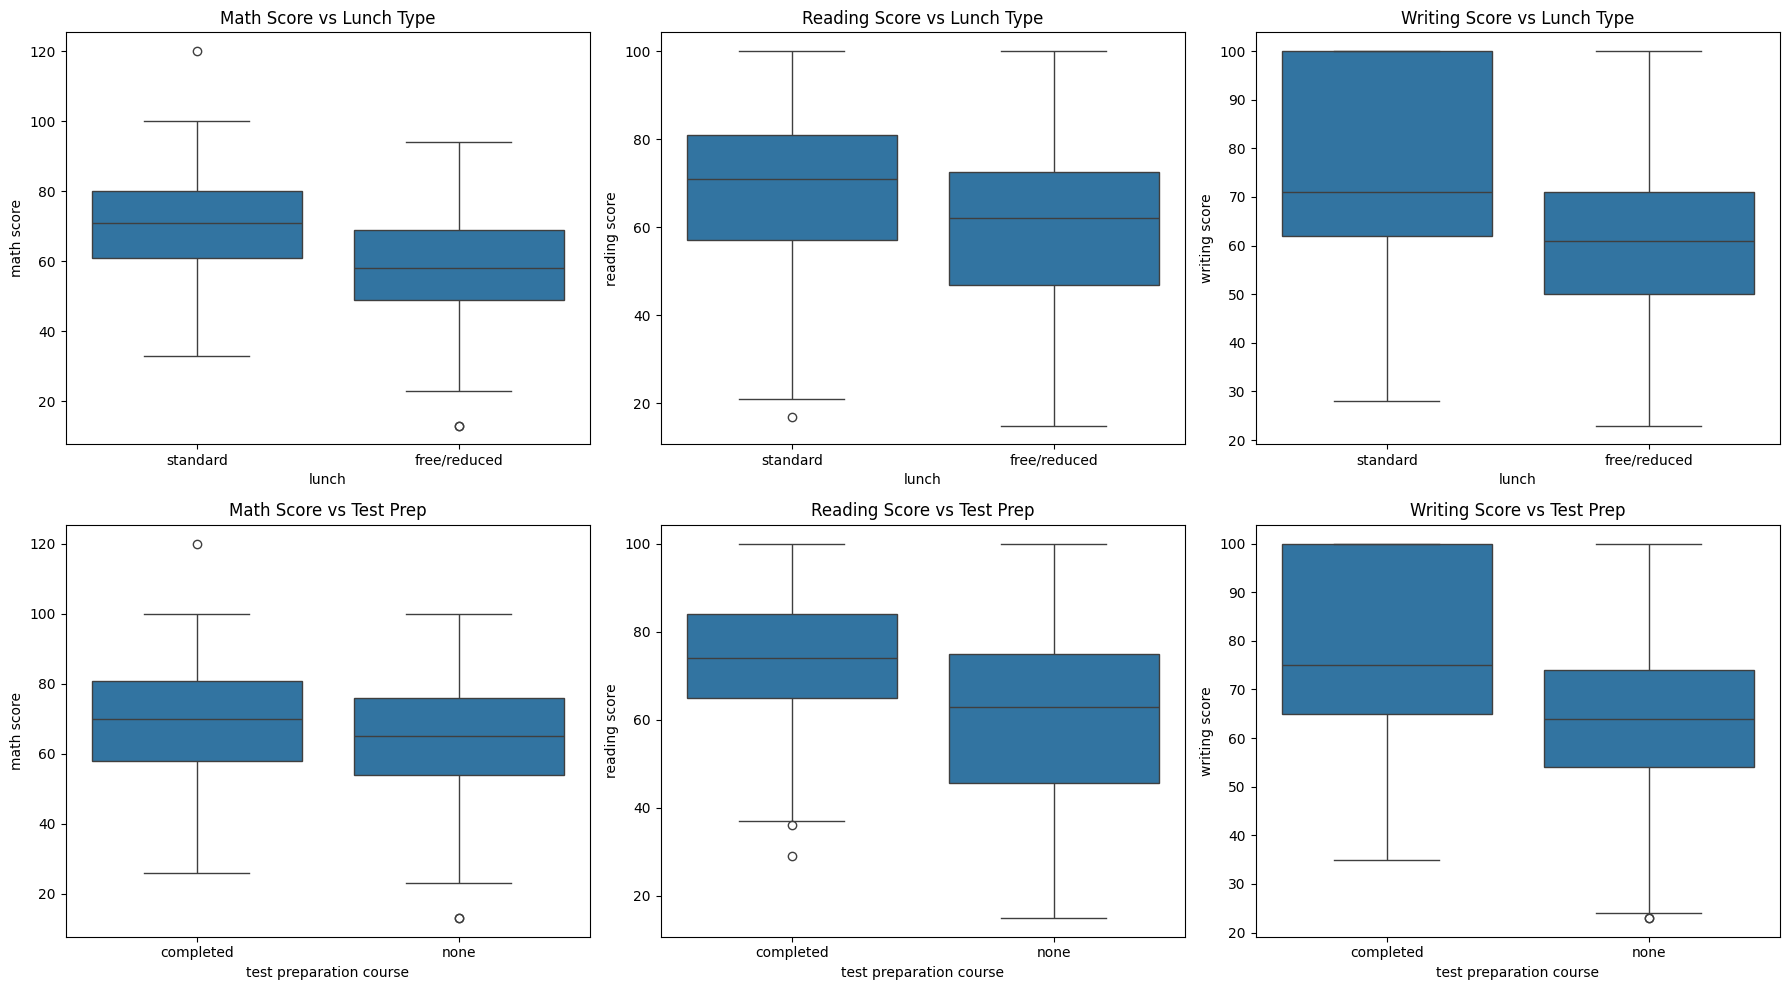

In [7]:
# Comparación del rendimiento según el tipo de almuerzo y preparación previa
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Tipo de almuerzo
sns.boxplot(data=df, x="lunch", y="math score", ax=axes[0, 0])
axes[0, 0].set_title("Math Score vs Lunch Type")

sns.boxplot(data=df, x="lunch", y="reading score", ax=axes[0, 1])
axes[0, 1].set_title("Reading Score vs Lunch Type")

sns.boxplot(data=df, x="lunch", y="writing score", ax=axes[0, 2])
axes[0, 2].set_title("Writing Score vs Lunch Type")

# Curso de preparación
sns.boxplot(data=df, x="test preparation course", y="math score", ax=axes[1, 0])
axes[1, 0].set_title("Math Score vs Test Prep")

sns.boxplot(data=df, x="test preparation course", y="reading score", ax=axes[1, 1])
axes[1, 1].set_title("Reading Score vs Test Prep")

sns.boxplot(data=df, x="test preparation course", y="writing score", ax=axes[1, 2])
axes[1, 2].set_title("Writing Score vs Test Prep")

plt.tight_layout()
plt.show()


1.- Los estudiantes que completaron el curso de preparación tienen mejores calificaciones en las tres áreas que aquellos que no lo hicieron.

2.- Los estudiantes que tienen almuerzo estándar tienen, en promedio, mejores calificaciones en matemáticas, lectura y escritura que aquellos con almuerzo gratuito o reducido. Esto probablemente sea una correlación con el estado socieconómico de la familia del niño y por tanto, no representar la causa raíz de un puntaje alto o bajo

La estrategia por la que el colegio podría optar es dar cursos de preparación para los con padres de bajo nivel educativo